In [1]:
import numpy as np
from astropy.io import fits
import lime 

In [2]:
def import_osiris_fits(file_address, ext=0):

    # Open the fits file
    with fits.open(file_address) as hdul:
        data, header = hdul[ext].data, hdul[ext].header

    # Reconstruct the wavelength array from the header data
    w_min, dw, n_pix = header['CRVAL1'],  header['CD1_1'], header['NAXIS1']
    w_max = w_min + dw * n_pix
    wavelength = np.linspace(w_min, w_max, n_pix, endpoint=False)

    return wavelength, data, header

In [3]:
# Address of the Green Pea galaxy spectrum
fits_file = '../../Downloads/gp121903_osiris.fits'

# Load spectrum
wave, flux, hdr = import_osiris_fits(fits_file)

In [4]:
# Galaxy redshift and the flux normalization
z_obj = 0.19531
normFlux = 1e-18

In [5]:
# Define a spectrum object
gp_spec = lime.Spectrum(wave, flux, redshift=z_obj, norm_flux=normFlux)

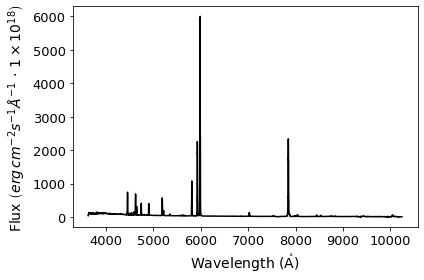

In [6]:
gp_spec.plot.spectrum(label='GP121903')

In [7]:
gp_spec.fit.bands(6563)

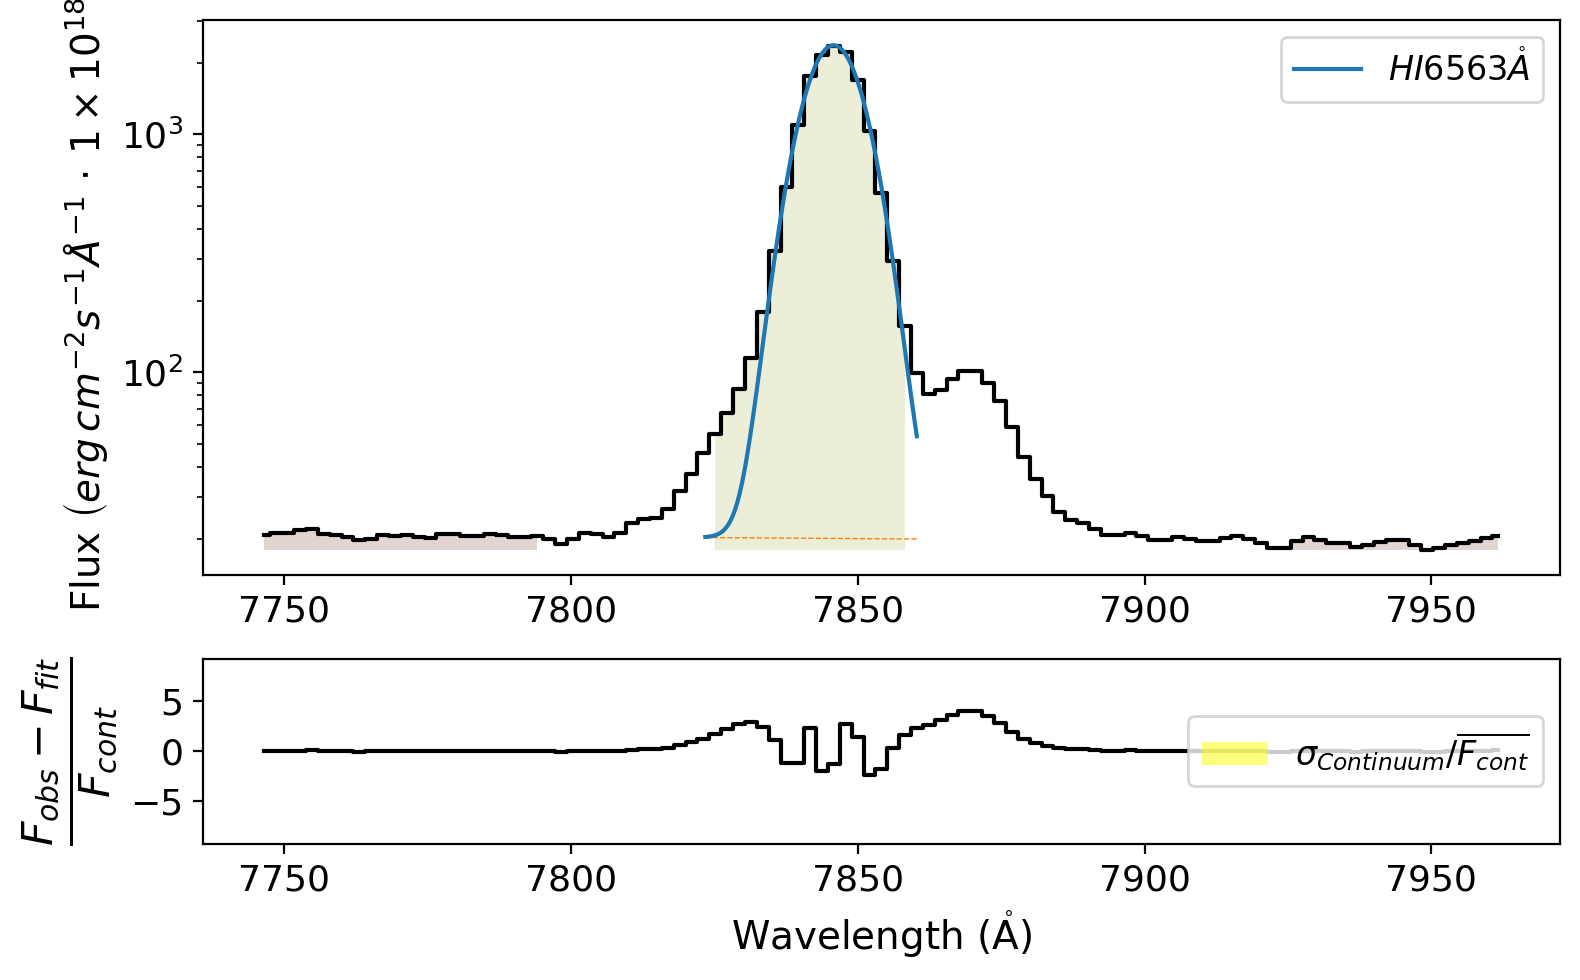

In [8]:
gp_spec.plot.bands()

In [11]:
hdul = fits.open("../../Downloads/gp121903_osiris.fits")

In [12]:
hdul.info()

Filename: ../../Downloads/gp121903_osiris.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     143   (3199,)   float32   


In [13]:
hdul.close()